In [100]:
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
import numpy as np
from matplotlib.pyplot import text
from matplotlib.pyplot import figure
import os


In [101]:
# read wellpad csv data as df
well_pad_df = pd.read_csv(os.path.join('..', '..', 'data','well_event_data', 'wells_regulator_permian.csv'))
# read gpkg as geodf
flaring_event_df = geopandas.read_file(os.path.join('..', '..', 'data','flaring_data', 'viirs_permian_FRP_ALL.gpkg'))

# convert df to geodf
well_pad_df = geopandas.GeoDataFrame(well_pad_df,
                                 geometry=geopandas.points_from_xy(well_pad_df.long, well_pad_df.lat).buffer(0.001),#0.001 500
                                 crs= 'epsg:4326')#3857 #4326

#well_pad_df = well_pad_df.to_crs("EPSG:4326")
flaring_event_df = flaring_event_df.to_crs("epsg:4326")

In [102]:

# # read wellpad csv data as df
# well_pad_df = pd.read_csv(os.path.join('..', '..', 'data','well_event_data', 'wells_regulator_permian.csv'))
# # read gpkg as geodf
# flaring_event_df = geopandas.read_file(os.path.join('..', '..', 'data','flaring_data', 'viirs_permian_FRP_ALL.gpkg'))

# # convert df to geodf
# well_pad_df = geopandas.GeoDataFrame(well_pad_df,geometry=geopandas.points_from_xy(well_pad_df.long, well_pad_df.lat))#3857 #4326


# well_pad_df['geometry'] = well_pad_df['geometry'].set_crs('epsg:3857')
# flaring_event_df = flaring_event_df.set_crs('epsg:3857')
# well_pad_df['geometry'] = well_pad_df['geometry'].buffer(5000)


In [103]:
# spatial join with wellpad and flaring event
# 34307 rows * 28 columns with buffer 0.001 in EPSG 4326, 0.001 latitude/longtitude I believe
# 0 rows * 28 columns with buffer 5000 in EPSG 3857 ,  5000m I believe
intersection = geopandas.sjoin(well_pad_df, flaring_event_df, how='inner')
intersection

,Unnamed: 0,api,state,basin,subbasin,county,source,geom,tst_permit_date,tst_permit_published_date,...,lat,long,style,geometry,index_right,id_,confidence,power,source_id,aq_date
143,143,4210336268,Texas,Permian,NaN,Crane,NaN,0101000020110F0000FC5C85B0F8CD65C189F51FAA3B44...,2013-10-29,NaN,...,31.5543,-102.6943,0,"POLYGON ((-102.69330 31.55430, -102.69330 31.5...",43536,207870868,8.0,0.434463,893080,2022-05-02T07:54:00
3471,3471,4210336239,Texas,Permian,NaN,Crane,NaN,0101000020110F00006FDFCE570CCE65C10FA6AC713544...,2013-08-21,NaN,...,31.5542,-102.6957,0,"POLYGON ((-102.69470 31.55420, -102.69470 31.5...",43536,207870868,8.0,0.434463,893080,2022-05-02T07:54:00
171,171,4237139634,Texas,Permian,NaN,Pecos,tx_trrc_permit_master,0101000020110F0000C68B35AD68D065C14E7AA4E47685...,2017-10-23,2017-10-26,...,30.8037,-102.7391,0,"POLYGON ((-102.73810 30.80370, -102.73810 30.8...",131206,107596629,8.0,0.346630,462733,2018-09-14T09:00:00
305,305,4237139735,Texas,Permian,NaN,Pecos,tx_trrc_permit_master,0101000020110F00009A0459AF68D065C1F5056C8A7185...,2018-04-24,2018-05-02,...,30.8036,-102.7391,0,"POLYGON ((-102.73810 30.80360, -102.73810 30.8...",131206,107596629,8.0,0.346630,462733,2018-09-14T09:00:00
297,297,4237139492,Texas,Permian,NaN,Pecos,tx_trrc_permit_master,0101000020110F000037B6D1E8E2F265C140E58065DD78...,2017-02-27,2018-02-10,...,30.7539,-103.3734,0,"POLYGON ((-103.37240 30.75390, -103.37240 30.7...",115029,130077941,8.0,0.799238,562106,2018-05-26T08:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,2021-09-30,...,31.7366,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",98358,158027888,8.0,0.446235,673693,2019-09-11T09:12:00
89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,2021-09-30,...,31.7366,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",31780,154261945,8.0,1.366868,660537,2019-09-19T08:18:00
89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,2021-09-30,...,31.7366,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",31945,154377108,8.0,1.133128,660922,2019-09-06T09:06:00
89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,2021-09-30,...,31.7366,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",82215,155918353,8.0,0.816003,666123,2019-09-03T08:18:00


In [104]:
#rename the first column
df_cal_filtered = intersection.copy()
df_cal_filtered.rename(columns = {'Unnamed: 0':'wellpad_id'}, inplace = True)


In [105]:
# convert to datetime format
df_cal_filtered['aq_date'] = pd.to_datetime(df_cal_filtered['aq_date']).dt.date
df_cal_filtered['tst_permit_date'] = pd.to_datetime(df_cal_filtered['tst_permit_date']).dt.date
df_cal_filtered['tst_completion_date'] = pd.to_datetime(df_cal_filtered['tst_completion_date']).dt.date
df_cal_filtered['tst_fracfocus_jobstart_date'] = pd.to_datetime(df_cal_filtered['tst_fracfocus_jobstart_date']).dt.date
df_cal_filtered['tst_fracfocus_jobend_date'] = pd.to_datetime(df_cal_filtered['tst_fracfocus_jobend_date']).dt.date
df_cal_filtered['tst_spud_date'] = pd.to_datetime(df_cal_filtered['tst_spud_date']).dt.date
df_cal_filtered['tst_permit_published_date'] = pd.to_datetime(df_cal_filtered['tst_permit_published_date']).dt.date
# using today - days to get wellpad age(days as unit )
df_cal_filtered['wellpad_vintage']= (pd.to_datetime("today").date() - df_cal_filtered['tst_spud_date'] ).dt.days


In [106]:
#not sure if we want that filter with permit, since we did first detection before 

# Keep rows where permit is prior to spud date
#df_cal_filtered = df_cal_filtered.loc[df_cal_filtered['tst_permit_date'] <= df_cal_filtered['tst_spud_date']]

# Keep rows where flaring data is after permit date
#df_cal_filtered = df_cal_filtered.loc[df_cal_filtered['tst_permit_date'] <= df_cal_filtered['aq_date']]

# Keep rows where First flaring detection is < 1 year after spud date


#df_cal_filtered = df_cal_filtered.loc[df_cal_filtered['tst_spud_date'] <= (df_cal_filtered['tst_spud_date'] + pd.offsets.DateOffset(years=1))]


df_cal_filtered = df_cal_filtered.reset_index()

In [107]:
df_cal_filtered

,index,wellpad_id,api,state,basin,subbasin,county,source,geom,tst_permit_date,...,long,style,geometry,index_right,id_,confidence,power,source_id,aq_date,wellpad_vintage
0,143,143,4210336268,Texas,Permian,NaN,Crane,NaN,0101000020110F0000FC5C85B0F8CD65C189F51FAA3B44...,2013-10-29,...,-102.6943,0,"POLYGON ((-102.69330 31.55430, -102.69330 31.5...",43536,207870868,8.0,0.434463,893080,2022-05-02,3113
1,3471,3471,4210336239,Texas,Permian,NaN,Crane,NaN,0101000020110F00006FDFCE570CCE65C10FA6AC713544...,2013-08-21,...,-102.6957,0,"POLYGON ((-102.69470 31.55420, -102.69470 31.5...",43536,207870868,8.0,0.434463,893080,2022-05-02,3180
2,171,171,4237139634,Texas,Permian,NaN,Pecos,tx_trrc_permit_master,0101000020110F0000C68B35AD68D065C14E7AA4E47685...,2017-10-23,...,-102.7391,0,"POLYGON ((-102.73810 30.80370, -102.73810 30.8...",131206,107596629,8.0,0.346630,462733,2018-09-14,1645
3,305,305,4237139735,Texas,Permian,NaN,Pecos,tx_trrc_permit_master,0101000020110F00009A0459AF68D065C1F5056C8A7185...,2018-04-24,...,-102.7391,0,"POLYGON ((-102.73810 30.80360, -102.73810 30.8...",131206,107596629,8.0,0.346630,462733,2018-09-14,1487
4,297,297,4237139492,Texas,Permian,NaN,Pecos,tx_trrc_permit_master,0101000020110F000037B6D1E8E2F265C140E58065DD78...,2017-02-27,...,-103.3734,0,"POLYGON ((-103.37240 30.75390, -103.37240 30.7...",115029,130077941,8.0,0.799238,562106,2018-05-26,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34302,89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,...,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",98358,158027888,8.0,0.446235,673693,2019-09-11,113
34303,89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,...,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",31780,154261945,8.0,1.366868,660537,2019-09-19,113
34304,89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,...,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",31945,154377108,8.0,1.133128,660922,2019-09-06,113
34305,89699,89699,4238939632,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000CD05B503F71166C1057717B0C672...,2021-09-27,...,-103.9452,3,"POLYGON ((-103.94420 31.73660, -103.94420 31.7...",82215,155918353,8.0,0.816003,666123,2019-09-03,113


In [108]:
# function to plot scatterplot  
def plot_flaring_date(group):
    x = group['aq_date']
    y = group['power']
    fig, ax1 = plt.subplots(figsize=(15,10))
    plt.plot(x, y, 'o', color='black')
    # Check for NAT, can't plot with any date is NaN or NaT   
    marker_list_noNAT = []
    # we want the 6 markers below 
    marker_list = np.array([group['tst_permit_date'].iloc[0],group['tst_permit_published_date'].iloc[0],group['tst_spud_date'].iloc[0],
                    group['tst_completion_date'].iloc[0],group['tst_fracfocus_jobstart_date'].iloc[0],
                            group['tst_fracfocus_jobend_date'].iloc[0]])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Power')
    #ax1.title('flaring_date_wellid_'+str(group['wellpad_id'].iloc[0]))
    for i in marker_list:
        if str(i) != 'NaT':
            marker_list_noNAT.append(i)
    # check Nat ends

    # getting Y min and Y max to draw vertical lines and annotations
    ymin,ymax = ax1.get_ylim()
    # convert date to num for x axis to show
    marker_list_noNAT = mdates.date2num(marker_list_noNAT)
    # plot makers (vertical line with dot)
    plt.vlines(x=marker_list_noNAT, ymin=ymin, ymax=ymax, linestyle='dotted',color = 'r')
    textlist = ['permit_date','permit_published_date','spud_date','regulator_completion_date',
                'fracfocus_jobstart_date','fracfocus_jobend_date']
    for i, x in enumerate(marker_list_noNAT):
        text(x, 0.7, textlist[i], rotation=90, verticalalignment='center')
        
    
    fig_path =  os.path.join('..', '..', 'png','')
    fig_name = 'flaring_date_wellid_'+ str(group['wellpad_id'].iloc[0])+'.png'

    plt.savefig(fig_path + fig_name)
    plt.clf()
    
    return fig

In [109]:
# no need to run again, this is to run scatterplot function
# get unique well id array
#wellpad_id = df_cal_filtered['wellpad_id'].unique()

#for i in wellpad_id:
    # for each well id, create a df, then pass it to function and plot it 
#    group = df_cal_filtered.groupby('wellpad_id').get_group(i)
    # if there is only one record, we can't plot so we want records that have at least 2 rows
#    if len(group.index)>1:
        # call the plot function here
#        plot_flaring_date(group)

In [110]:
https://tbotix.quip.com/TcSBARYVA2Uq/Shihao-Project-Objectives-Deliverables# creating agg dataframe
df_cal_result  = pd.DataFrame()
# get flaring event count by flaring event id, group by wellpad id
df_cal_result['flare_n'] = df_cal_filtered.groupby(['wellpad_id'])['id_'].agg('count')
# get total flaring power 
df_cal_result['sum_FRP'] = df_cal_filtered.groupby(['wellpad_id'])['power'].agg('sum')
# using the first two to get intensity 
df_cal_result['flaring_intensity'] = df_cal_result['sum_FRP'] / df_cal_result['flare_n']
# get flaring start time 
df_cal_result['flare_t_start'] =  df_cal_filtered.groupby(['wellpad_id'])['aq_date'].agg('min')
# get flaring end time 
df_cal_result['flare_t_end'] =  df_cal_filtered.groupby(['wellpad_id'])['aq_date'].agg('max')
#get the peak power 
df_cal_result['peak_power'] = df_cal_filtered.groupby(['wellpad_id'])['power'].agg('max')
#df_cal_result['peak_flare_date']= df_cal_filtered.groupby(['wellpad_id'])['power'].idxmax()

# using end - start to get the duration
df_cal_result['flaring_duration'] = (df_cal_result['flare_t_end'] - df_cal_result['flare_t_start']).dt.days

# finding mid using start and end time 
df_cal_result['flare_t_mid'] = df_cal_result['flare_t_start'] +(df_cal_result['flare_t_end'] - df_cal_result['flare_t_start'])/2
#getting vintage using mean/max/min is ok since they are all the same for the same wellpad id
df_cal_result['wellpad_vintage'] =  df_cal_filtered.groupby(['wellpad_id'])['wellpad_vintage'].agg('mean')
# getting the date for wellpad_t_vintage instead of days
df_cal_result['wellpad_t_vintage'] = df_cal_filtered.groupby(['wellpad_id'])['tst_spud_date'].min()
# getting the year for wellpad_t_vintage 
df_cal_result['wellpad_y_vintage'] = pd.to_datetime( df_cal_result['wellpad_t_vintage']).dt.year

df_cal_result = df_cal_result.reset_index()
# peak date here need to use index so need to reset index first 
df_cal_result['peak_date'] = df_cal_filtered['aq_date'][df_cal_filtered.groupby(['wellpad_id'])['power'].idxmax()].reset_index(drop=True)
df_cal_result

D:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


,wellpad_id,flare_n,sum_FRP,flaring_intensity,flare_t_start,flare_t_end,peak_power,flaring_duration,flare_t_mid,wellpad_vintage,wellpad_t_vintage,wellpad_y_vintage,peak_date
0,143,1,0.434463,0.434463,2022-05-02,2022-05-02,0.434463,0,2022-05-02,3113.0,2013-11-16,2013,2022-05-02
1,171,1,0.346630,0.346630,2018-09-14,2018-09-14,0.346630,0,2018-09-14,1645.0,2017-11-23,2017,2018-09-14
2,297,1,0.799238,0.799238,2018-05-26,2018-05-26,0.799238,0,2018-05-26,1910.0,2017-03-03,2017,2018-05-26
3,301,1,0.799238,0.799238,2018-05-26,2018-05-26,0.799238,0,2018-05-26,1823.0,2017-05-29,2017,2018-05-26
4,305,1,0.346630,0.346630,2018-09-14,2018-09-14,0.346630,0,2018-09-14,1487.0,2018-04-30,2018,2018-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8449,89652,1,0.817985,0.817985,2022-03-09,2022-03-09,0.817985,0,2022-03-09,276.0,2021-08-23,2021,2022-03-09
8450,89653,1,0.817985,0.817985,2022-03-09,2022-03-09,0.817985,0,2022-03-09,276.0,2021-08-23,2021,2022-03-09
8451,89660,1,0.757595,0.757595,2021-05-16,2021-05-16,0.757595,0,2021-05-16,898.0,2019-12-10,2019,2021-05-16
8452,89699,10,7.953231,0.795323,2019-08-06,2019-11-05,1.612865,91,2019-09-20,113.0,2022-02-02,2022,2019-08-20


In [111]:
#filter out wellpad_t_vintage > flare_t_start   assuming flaring after spud date  

df_cal_result = df_cal_result.loc[df_cal_result['wellpad_t_vintage'] <= df_cal_result['flare_t_start'] ]


# round intensity, but didn't use at the end
df_cal_result['flaring_intensity_rounded'] = df_cal_result['flaring_intensity'].round(2)

C:\Users\Shihao Zhou\AppData\Local\Temp\ipykernel_26808\131315603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_result['flaring_intensity_rounded'] = df_cal_result['flaring_intensity'].round(2)


In [112]:
# 2778 wellpad only have one time flaring event (from 2012-2022)
df_cal_result[df_cal_result['flaring_duration']==0].count()

wellpad_id                   2778
flare_n                      2778
sum_FRP                      2778
flaring_intensity            2778
flare_t_start                2778
flare_t_end                  2778
peak_power                   2778
flaring_duration             2778
flare_t_mid                  2778
wellpad_vintage              2778
wellpad_t_vintage            2778
wellpad_y_vintage            2778
peak_date                    2778
flaring_intensity_rounded    2778
dtype: int64

In [113]:
# randomly get one to check data
df_cal_filtered.groupby('wellpad_id').get_group(89701)

,index,wellpad_id,api,state,basin,subbasin,county,source,geom,tst_permit_date,...,long,style,geometry,index_right,id_,confidence,power,source_id,aq_date,wellpad_vintage
25120,89701,89701,4238939731,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000C24DC55AE31466C145DFC18D5E66...,2021-12-22,...,-103.999,3,"POLYGON ((-103.99800 31.68800, -103.99800 31.6...",45964,75985257,8.0,1.062582,329345,2018-05-12,120
34306,89701,89701,4238939731,Texas,Permian,Delaware,Reeves,tx_trrc_permit_master,0101000020110F0000C24DC55AE31466C145DFC18D5E66...,2021-12-22,...,-103.999,3,"POLYGON ((-103.99800 31.68800, -103.99800 31.6...",89284,118475324,8.0,0.959465,512380,2018-07-07,120


In [114]:
# ---------------------------------skip this ---------------------
#trying to polt but not good
df = pd.DataFrame({'pre2017': df_cal_result [df_cal_result['wellpad_y_vintage'] < 2017]['flaring_intensity_rounded'],
                   'at2017': df_cal_result [df_cal_result['wellpad_y_vintage'] == 2017]['flaring_intensity_rounded'],
                   'at2018': df_cal_result [df_cal_result['wellpad_y_vintage'] == 2018]['flaring_intensity_rounded'],
                   'at2019': df_cal_result [df_cal_result['wellpad_y_vintage'] == 2019]['flaring_intensity_rounded'],
                    'at2020': df_cal_result [df_cal_result['wellpad_y_vintage'] == 2020]['flaring_intensity_rounded'],
                    'at2021': df_cal_result [df_cal_result['wellpad_y_vintage'] == 2021]['flaring_intensity_rounded'],
                    'at2022': df_cal_result [df_cal_result['wellpad_y_vintage'] == 2022]['flaring_intensity_rounded']})

In [115]:
# filter out frp > 2
# df[df['pre2017']>2] = 0
# df[df['at2017']>2] = 0
# df[df['at2018']>2] = 0
# df[df['at2019']>2] = 0
# df[df['at2020']>2] = 0
# df[df['at2021']>2] = 0
# df[df['at2022']>2] = 0

In [116]:
# ---------------------------------skip this ---------------------
pre2017 =  df_cal_result [df_cal_result['wellpad_y_vintage'] < 2017]['flaring_intensity_rounded'].to_list()
at2017 = df_cal_result [df_cal_result['wellpad_y_vintage'] == 2017]['flaring_intensity_rounded'].to_list()
at2018 = df_cal_result [df_cal_result['wellpad_y_vintage'] == 2018]['flaring_intensity_rounded'].to_list()
at2019 = df_cal_result [df_cal_result['wellpad_y_vintage'] == 2019]['flaring_intensity_rounded'].to_list()
at2020 = df_cal_result [df_cal_result['wellpad_y_vintage'] == 2020]['flaring_intensity_rounded'].to_list()
at2021 = df_cal_result [df_cal_result['wellpad_y_vintage'] == 2021]['flaring_intensity_rounded'].to_list()
at2022 = df_cal_result [df_cal_result['wellpad_y_vintage'] == 2022]['flaring_intensity_rounded'].to_list()

In [117]:
#len(df.pre2017.to_list())

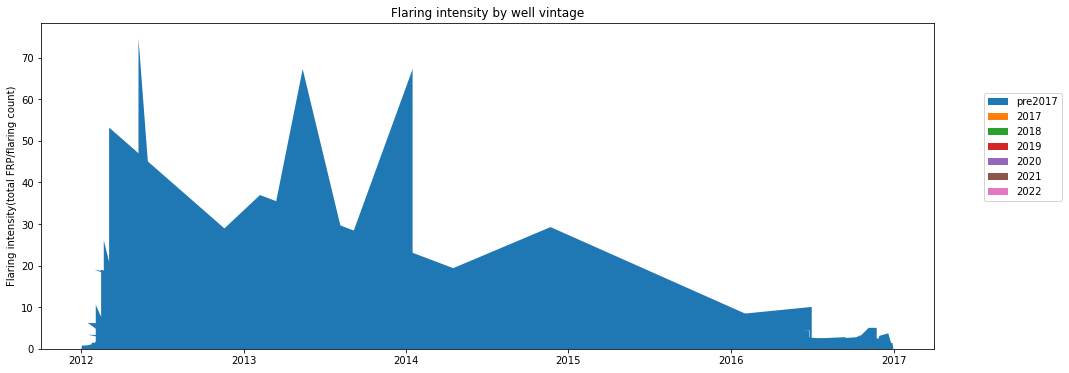

In [118]:
# ---------------------------------skip this ---------------------
#create area chart

labels=["pre2017", '2017',"2018", "2019", "2020", "2021", "2022"]
fig = plt.figure(figsize=(16,6))
#plt.ylim(0, 30)
#dates = [i for i in range(8454)]
plt.stackplot(df_cal_result['wellpad_t_vintage'],df.pre2017.to_list(),df.at2017.to_list(), df.at2018.to_list(), df.at2019.to_list(),df.at2020.to_list(),
              df.at2021.to_list(),df.at2022.to_list(),labels=labels)

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Flaring intensity by well vintage')
plt.ylabel('Flaring intensity(total FRP/flaring count)')
#plt.xticks(np.arange(2015,2022,step=1), rotation=40)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


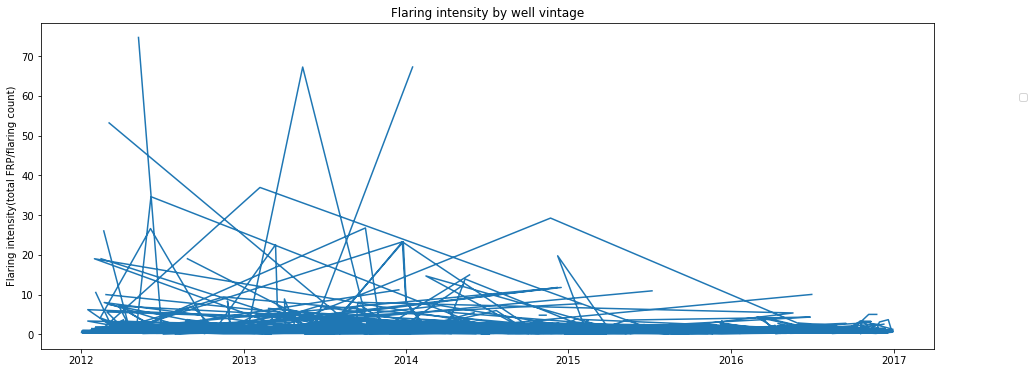

In [119]:
# ---------------------------------skip this ---------------------
#create area chart


fig = plt.figure(figsize=(16,6))
#plt.ylim(0, 30)
#dates = [i for i in range(8454)]
plt.plot(df_cal_result['wellpad_t_vintage'],df.pre2017.to_list(),df.at2017.to_list(), df.at2018.to_list(), df.at2019.to_list(),df.at2020.to_list(),
              df.at2021.to_list(),df.at2022.to_list())

plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Flaring intensity by well vintage')
plt.ylabel('Flaring intensity(total FRP/flaring count)')
#plt.xticks(np.arange(2015,2022,step=1), rotation=40)

plt.show()

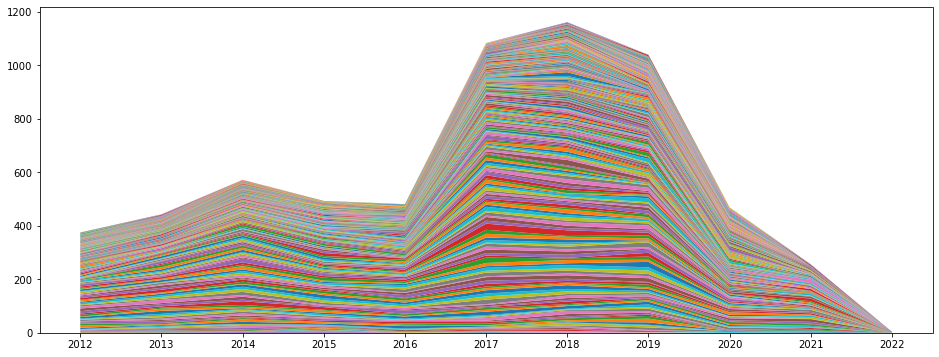

In [120]:
# ---------------------------------skip this ---------------------
# seems like the data need to be transformed

labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021","2022"]

stack_data = pd.crosstab(df_cal_result['wellpad_y_vintage'], df_cal_result['flaring_intensity_rounded'], dropna=False)

stack_array = stack_data.values.T.tolist()

#pal = sns.color_palette("Set1")
fig = plt.figure(figsize=(16,6))

plt.stackplot(
    labels, stack_array)

#plt.legend(loc='upper left')
plt.show()


In [121]:
# ---------------------------------skip this ---------------------
# this transformation didn't work well
stack_data.T

wellpad_y_vintage,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
flaring_intensity_rounded,,,,,,,,,,,
0.11,0,0,0,0,0,2,0,0,0,0,0
0.12,1,0,0,0,0,0,0,0,0,0,0
0.15,1,1,0,0,0,0,0,0,0,0,0
0.16,0,0,0,0,1,0,0,0,0,0,0
0.17,0,0,4,5,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
36.95,0,1,0,0,0,0,0,0,0,0,0
46.26,0,0,0,0,0,0,2,0,0,0,0
53.17,1,0,0,0,0,0,0,0,0,0,0


In [122]:
# To make a similar graph as the FT article, we need a 2D array with wellpad_y_vintage, year, values are flaring intensity. 
# we use the flare_mid_year as year  (might not be ideal)

df_cal_result['flare_mid_ym'] = pd.to_datetime( df_cal_result['flare_t_mid']).dt.strftime('%Y-%m')
df_cal_result['flare_mid_year'] = pd.to_datetime( df_cal_result['flare_t_mid']).dt.year
df_cal_result['flare_mid_year']

C:\Users\Shihao Zhou\AppData\Local\Temp\ipykernel_26808\109160124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_result['flare_mid_ym'] = pd.to_datetime( df_cal_result['flare_t_mid']).dt.strftime('%Y-%m')
C:\Users\Shihao Zhou\AppData\Local\Temp\ipykernel_26808\109160124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_result['flare_mid_year'] = pd.to_datetime( df_cal_result['flare_t_mid']).dt.year


0       2022
1       2018
2       2018
3       2018
4       2018
        ... 
8447    2022
8448    2022
8449    2022
8450    2022
8451    2021
Name: flare_mid_year, Length: 6376, dtype: int64

In [123]:
# ---------------------------------skip this ---------------------
# another try but fail , 2d array with year and flaring_intensity, values are wellpad id
table = pd.pivot_table(df_cal_result, values='flaring_intensity_rounded', index=df_cal_result['wellpad_y_vintage'].values,
                    columns=['wellpad_id'], aggfunc=np.mean)
table1 = pd.pivot_table(df_cal_result, values='wellpad_id', index=df_cal_result['wellpad_y_vintage'].values,
                    columns='flaring_intensity_rounded')
df = table1.T.dropna(thresh=2)
df


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
flaring_intensity_rounded,,,,,,,,,,,
0.15,32300.0,32301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.17,NaN,NaN,62692.0,62588.60,NaN,NaN,25514.0,NaN,NaN,NaN,NaN
0.18,40960.0,64604.0,NaN,NaN,NaN,NaN,4150.0,NaN,NaN,NaN,NaN
0.19,70097.0,NaN,NaN,50426.00,NaN,NaN,43638.5,68976.500000,NaN,NaN,NaN
0.20,64051.0,49934.0,NaN,47908.25,NaN,64988.0,78816.0,NaN,NaN,53178.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37885.000000,63114.0,NaN,NaN
5.12,NaN,45054.0,NaN,NaN,NaN,69205.0,55037.0,NaN,NaN,NaN,NaN
5.40,NaN,NaN,NaN,NaN,3317.0,NaN,NaN,56845.666667,NaN,NaN,NaN


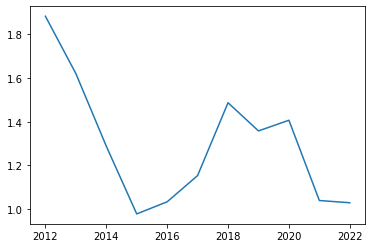

In [124]:
# trying one line with the right direction
table2=df_cal_result.groupby(['wellpad_y_vintage']).agg('mean').iloc[:,3]


plt.plot(table2)

In [125]:
# going the right direction, using mean to get intensity for each year for each aged wellpad
table2 = df_cal_result.groupby(['wellpad_y_vintage','flare_mid_year']).agg('mean')

# table3 for monthly graph
table3 = df_cal_result.groupby(['wellpad_y_vintage','flare_mid_ym']).agg('mean')


table2

wellpad_id   flare_n   sum_FRP  \
wellpad_y_vintage flare_mid_year                                     
2012              2012            50562.514286  2.400000  1.635250   
                  2013            48031.731343  2.179104  1.515990   
                  2014            51431.421053  3.078947  2.728790   
                  2015            46426.500000  3.687500  2.560894   
                  2016            51786.103448  4.793103  5.959329   
...                                        ...       ...       ...   
2020              2021            54367.825215  3.415473  4.868010   
                  2022            60761.311111  1.777778  2.814922   
2021              2021            55363.381356  2.864407  3.182596   
                  2022            54242.007246  2.731884  2.643007   
2022              2022            87618.250000  1.000000  1.029349   

                                  flaring_intensity  peak_power  \
wellpad_y_vintage flare_mid_year                                  
2012              2012                     0.752668    0.831794   
                  2013                     0.643390    0.761408   
                  2014                     1.021736    1.255993   
                  2015                     0.703732    0.958281   
                  2016                     1.170309    2.078083   
...                                             ...         ...   
2020              2021                     1.440248    2.044212   
                  2022                     1.476159    1.950800   
2021              2021                     1.148680    1.495467   
                  2022                     0.946313    1.153245   
2022              2022                     1.029349    1.029349   

                                  flaring_duration  wellpad_vintage  \
wellpad_y_vintage flare_mid_year                                      
2012              2012                   26.457143      3683.342857   
                  2013                   64.492537      3577.791045   
                  2014                  285.421053      3623.684211   
                  2015                  407.218750      3620.656250   
                  2016                 1046.413793      3620.517241   
...                                            ...              ...   
2020              2021                   91.828080       696.495702   
                  2022                   24.133333       685.533333   
2021              2021                   36.381356       441.110169   
                  2022                   26.231884       318.391304   
2022              2022                    0.000000        79.250000   

                                  flaring_intensity_rounded  
wellpad_y_vintage flare_mid_year                             
2012              2012                             0.752571  
                  2013                             0.643284  
                  2014                             1.022105  
                  2015                             0.704375  
                  2016                             1.171724  
...                                                     ...  
2020              2021                             1.440487  
                  2022                             1.475333  
2021              2021                             1.148475  
                  2022                             0.946304  
2022              2022                             1.032500  

[65 rows x 8 columns]

In [126]:
# unstack tables 
#t2= table2['flaring_intensity'].unstack().iloc[:, :-1]
t2= table2['flaring_intensity'].unstack()
t3= table3['flaring_intensity'].unstack()
t2

flare_mid_year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
wellpad_y_vintage,,,,,,,,,,,
2012,0.752668,0.64339,1.021736,0.703732,1.170309,1.509736,1.674593,2.399680,1.482020,1.727505,15.934885
2013,NaN,0.57448,1.088285,0.902642,2.331739,1.328545,0.930213,1.418860,4.003532,1.097549,16.406703
2014,NaN,NaN,0.636001,0.720582,0.904620,1.348591,1.602478,1.194563,2.031561,1.029491,9.687401
2015,NaN,NaN,NaN,0.870475,0.777736,0.899703,1.284804,0.993246,1.258405,1.305126,NaN
2016,NaN,NaN,NaN,NaN,0.722279,0.809809,1.160189,1.379131,0.956248,1.239890,0.991231
2017,NaN,NaN,NaN,NaN,NaN,0.919647,1.239866,1.228907,1.036644,0.976315,1.068610
2018,NaN,NaN,NaN,NaN,NaN,NaN,1.639749,1.301854,1.578077,1.087610,6.311473
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.081085,1.501537,1.335733,1.057475
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.209643,1.440248,1.476159


In [127]:
t2.columns

Int64Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='flare_mid_year')

In [128]:
t3.columns

Index(['2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11', '2012-12',
       ...
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05'],
      dtype='object', name='flare_mid_ym', length=122)

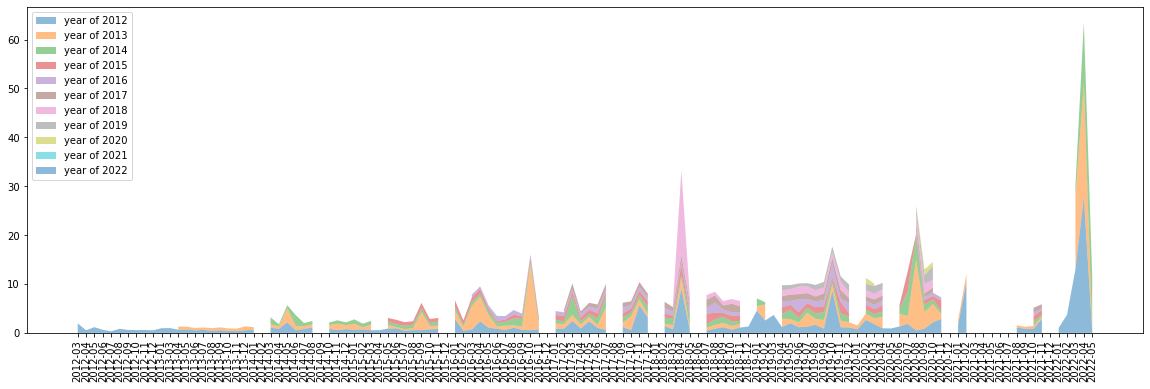

In [129]:
# plot monthly 
fig  = plt.figure(figsize=(20,6))
labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021","2022"]
#labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021"]

legends = ["year of 2012","year of 2013","year of 2014","year of 2015","year of 2016","year of 2017", "year of 2018", "year of 2019", "year of 2020", "year of 2021","year of 2022"]
#legends = ["year of 2012","year of 2013","year of 2014","year of 2015","year of 2016","year of 2017", "year of 2018", "year of 2019", "year of 2020", "year of 2021"]
plt.stackplot(t3.columns, t3,alpha=0.5,labels=labels)
plt.xticks(rotation=90)
plt.legend(legends,loc='upper left')
#datetick('x','yyyy','keeplimits')


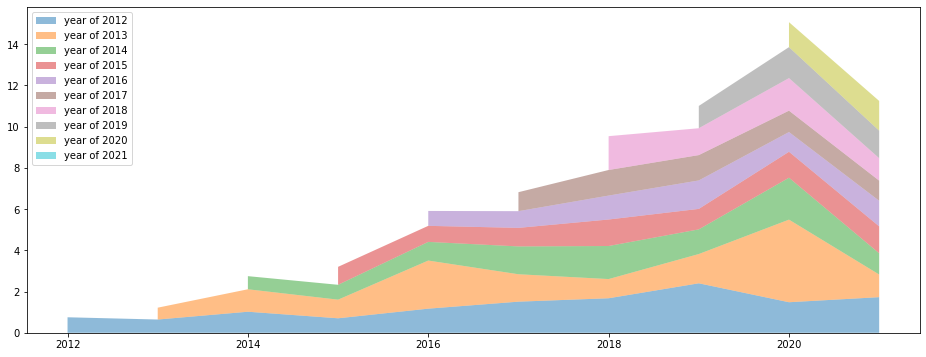

In [130]:
# plot yearly without 2022
fig  = plt.figure(figsize=(16,6))
#labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021","2022"]
labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021"]
#legends = ["year of 2012","year of 2013","year of 2014","year of 2015","year of 2016","year of 2017", "year of 2018", "year of 2019", "year of 2020", "year of 2021","year of 2022"]
legends = ["year of 2012","year of 2013","year of 2014","year of 2015","year of 2016","year of 2017", "year of 2018", "year of 2019", "year of 2020", "year of 2021"]
plt.stackplot(t2.columns[:-1], t2.iloc[:, :-1],alpha=0.5,labels=labels)
plt.legend(legends,loc='upper left')


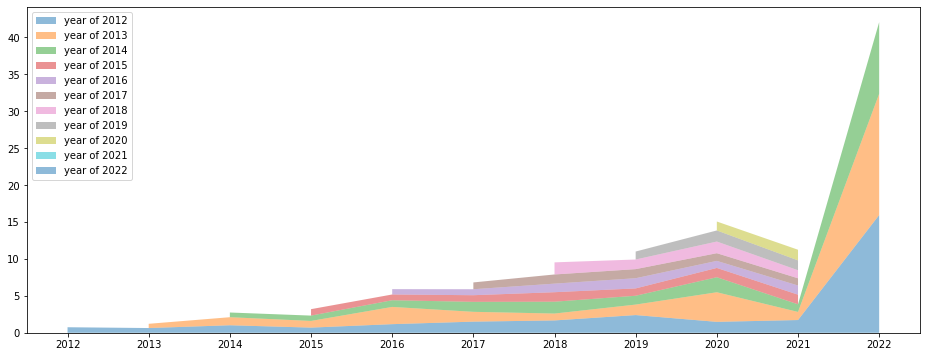

In [131]:
# plot yearly with 2022
fig  = plt.figure(figsize=(16,6))
labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021","2022"]
#labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021"]
legends = ["year of 2012","year of 2013","year of 2014","year of 2015","year of 2016","year of 2017", "year of 2018", "year of 2019", "year of 2020", "year of 2021","year of 2022"]
#legends = ["year of 2012","year of 2013","year of 2014","year of 2015","year of 2016","year of 2017", "year of 2018", "year of 2019", "year of 2020", "year of 2021"]
plt.stackplot(labels, t2,alpha=0.5,labels=labels)
plt.legend(legends,loc='upper left')

In [132]:
# ---------------------------------skip this ---------------------
table.T

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
wellpad_id,,,,,,,,,,,
143,NaN,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,0.35,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,0.80,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,0.80,NaN,NaN,NaN,NaN,NaN
305,NaN,NaN,NaN,NaN,NaN,NaN,0.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
89650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80,NaN
89651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81,NaN
89652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


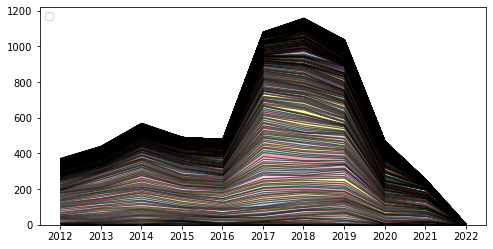

In [133]:
# ---------------------------------skip this ---------------------
labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021","2022"]

stack_data = pd.crosstab(df_cal_result['wellpad_y_vintage'], df_cal_result['flaring_intensity_rounded'], dropna=False)


pal = sns.color_palette("Set1")
plt.figure(figsize=(8,4))


plt.stackplot(
    labels, stack_array,
    colors=pal, alpha=0.4, edgecolor="black")

plt.legend(loc='upper left')
plt.show()

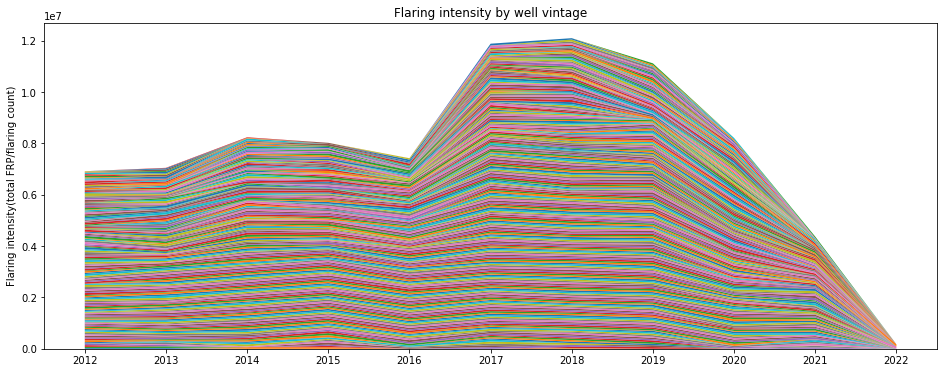

In [134]:
# ---------------------------------skip this ---------------------
#stack_data.T.

#create area chart

labels = ["2012","2013","2014","2015","2016","2017", "2018", "2019", "2020", "2021","2022"]


fig = plt.figure(figsize=(16,6))

# plt.stackplot(stack_data.columns,stack_data.T.iloc[:, 0].tolist(), stack_data.T.iloc[:, 1].tolist(), stack_data.T.iloc[:, 2].tolist(),
#               stack_data.T.iloc[:, 3].tolist(),stack_data.T.iloc[:, 4].tolist(),stack_data.T.iloc[:, 5].tolist(),
#               stack_data.T.iloc[:, 6].tolist(),stack_data.T.iloc[:, 7].tolist(),
#               stack_data.T.iloc[:, 8].tolist(),stack_data.T.iloc[:, 9].tolist(),stack_data.T.iloc[:, 10].tolist())


plt.stackplot(labels,df.fillna(0))
#plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.title('Flaring intensity by well vintage')
plt.ylabel('Flaring intensity(total FRP/flaring count)')
#plt.xticks(np.arange(2015,2022,step=1), rotation=40)

plt.show()